Logistic Regression - Regularized

In [764]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib inline

In [765]:
df = pd.read_csv('ex2data2.txt', names = ["test1", "test2", "pass"])
df.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [766]:
score_admitted = df.loc[df['pass']==1,['test1','test2']]
score_dropped = df.loc[df['pass']==0,['test1','test2']]


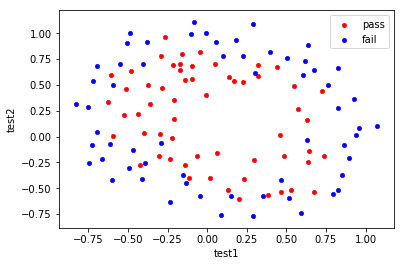

In [767]:
ax = score_admitted.plot(x='test1', y='test2', kind='scatter', marker='o', c='red', lw=0.5, label='pass')
ax.set_xlabel("Test 1")
ax.set_ylabel("Test 2")
score_dropped.plot(x='test1', y='test2', kind='scatter', marker='o', c='blue', lw=0.5, label='fail', ax=ax)


In [768]:
def Sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [769]:
Sigmoid(1)

0.7310585786300049

In [770]:
df.insert(0, column='x0', value=1.0)

In [771]:
df.head()

,x0,test1,test2,pass
0,1.0,0.051267,0.69956,1
1,1.0,-0.092742,0.68494,1
2,1.0,-0.213710,0.69225,1
3,1.0,-0.375000,0.50219,1
4,1.0,-0.513250,0.46564,1


In [772]:
x1 = np.array(df.iloc[:,1])
x2 = np.array(df.iloc[:,2])
df2 = df
df2.head()

,x0,test1,test2,pass
0,1.0,0.051267,0.69956,1
1,1.0,-0.092742,0.68494,1
2,1.0,-0.213710,0.69225,1
3,1.0,-0.375000,0.50219,1
4,1.0,-0.513250,0.46564,1


In [773]:
deg=6
for i in range(0,deg+1):
    for j in range(0,deg-i+1):
        df2['f' + str(i) + str(j)] = np.power(x1,i)*np.power(x2,j)
df2.head()

,x0,test1,test2,pass,f00,f01,f02,f03,f04,f05,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.051267,0.69956,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,-0.092742,0.68494,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,-0.213710,0.69225,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,-0.375000,0.50219,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,-0.513250,0.46564,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [774]:
df2.drop('x0', axis=1, inplace=True)
df2.drop('test1', axis=1, inplace=True)
df2.drop('test2', axis=1, inplace=True)
df2.head()

,pass,f00,f01,f02,f03,f04,f05,f06,f10,f11,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [775]:
theta = np.zeros(28)
theta0 = theta

In [776]:
y = np.array(df2.iloc[:,0])
X = np.array(df2.iloc[:,1:29]).T

In [777]:
X.shape, theta.shape, y.shape

((28, 118), (28,), (118,))

In [778]:
num_iters= 500
alpha = 0.00005
lam = 1

In [779]:
def Computecost(X, y, theta):
    cost = 0.0
    m = len(y)
    error = theta.T@X-y
    cost = np.sum(error**2)/(2*m)
    return cost

In [780]:
def ComputecostLogistic(X, y, theta):
    m = len(y)
    h = Sigmoid(theta.T@X)
    cost_term = -1*y*np.log(h)-(1-y)*np.log(1-h)
    return np.sum(cost_term/m)

In [781]:
def ComputecostLogisticRegularized(theta, X, y, lam):
    m = len(y)
    h = Sigmoid(theta.T@X)
    first_term = -1*y*np.log(h)-(1-y)*np.log(1-h)
    first_sum = np.sum(first_term/m)
    theta_for_penalty = theta[1:]
    second_term = np.power(theta_for_penalty,2)
    second_sum = np.sum(lam/(2*m)*second_term)
    return first_sum+second_sum

In [782]:
theta[1:].size

27

In [783]:
J = ComputecostLogisticRegularized(theta, X, y, lam)

In [784]:
J

0.6931471805599451

In [785]:
def gradientDescent(X, y, theta, alpha):
    m = len(y)
    term = (theta.T @ X - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [786]:
def gradientDescentLogistic(X, y, theta, alpha):
    m = len(y)
    term = (Sigmoid(theta.T @ X) - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [787]:
def gradientDescentLogisticRegularized(theta, X, y, lam):
    m = len(y)
    n = len(theta)
    lam_array = lam*np.ones(n)
    lam_array[0] = 0
    term = (Sigmoid(theta.T @ X) - y) * X 
    grad = 1/m*np.sum(term, axis=1) + lam_array/m*theta
    return grad

In [788]:
gradientDescentLogisticRegularized(theta,X,y,lam)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

In [789]:
J_hist = np.zeros(num_iters)

for num in range(0, num_iters):
    theta_delta = gradientDescentLogisticRegularized(theta, X, y, lam)
    J = ComputecostLogisticRegularized(theta, X, y, lam)
    theta = theta - theta_delta
    #print("Iter:", num, " Cost:", J)
    J_hist[num] = J


In [790]:
theta1 = theta
print("theta=",theta)

theta= [ 1.2707781   1.18012329 -1.42548616 -0.17453022 -1.19247291 -0.45859667
 -0.92755336  0.62433207 -0.91431216 -0.35839131 -0.27389139 -0.29524652
 -0.1433771  -2.01689612 -0.3657215  -0.61542775 -0.27727806 -0.32724731
  0.12416125 -0.05295606 -0.04647433  0.01443361 -1.45803639 -0.20671663
 -0.29271302 -0.24170623  0.0262404  -1.04355344]


Text(0, 0.5, 'cost')

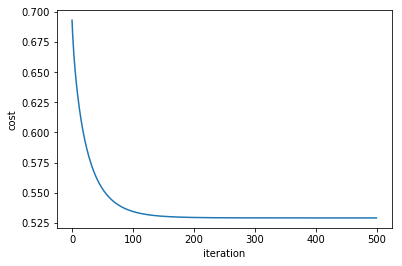

In [791]:
plt.plot(J_hist)
plt.xlabel('iteration')
plt.ylabel('cost')

In [792]:
J

0.5290031804812527

In [793]:
result = opt.minimize(ComputecostLogisticRegularized, theta, args=(X,y,lam))

In [794]:
theta_sol = result.x
theta_sol

array([ 1.27286863,  1.18116929, -1.43165471, -0.17477374, -1.19313533,
       -0.4563855 , -0.92509191,  0.6253893 , -0.91735312, -0.35771396,
       -0.27474581, -0.29559229, -0.14393133, -2.01996658, -0.36581701,
       -0.61596591, -0.27784875, -0.32755067,  0.1242837 , -0.05133008,
       -0.04508395,  0.01537226, -1.45856678, -0.20622089, -0.29266986,
       -0.24203747,  0.02755363, -1.04355284])

In [795]:
x1plot = np.linspace(-1, 1.5, 50)
x2plot = np.linspace(-1, 1.5, 50)
z = np.zeros((len(x1plot), len(x2plot)))

In [796]:
def evaluateZ(theta, x1_val, x2_val):
    features = np.zeros(theta.shape)
    deg=6
    idx=0
    for i in range(0,deg+1):
        for j in range(0,deg-i+1):
            features[idx] = np.power(x1_val,i)*np.power(x2_val,j)
            idx = idx+1
    return features.T@theta


In [797]:
for i in range(len(x1plot)):
    for j in range(len(x2plot)):
        z[i,j] = evaluateZ(theta_sol,x1plot[i],x2plot[j])

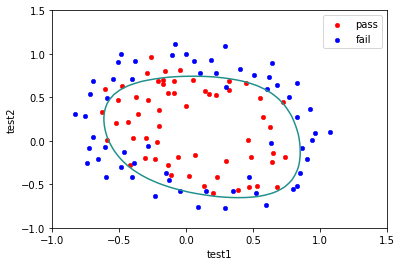

In [798]:
ax = score_admitted.plot(x='test1', y='test2', kind='scatter', marker='o', c='red', lw=0.5, label='pass')
ax.set_xlabel("Test 1")
ax.set_ylabel("Test 2")
score_dropped.plot(x='test1', y='test2', kind='scatter', marker='o', c='blue', lw=0.5, label='fail', ax=ax)
plt.contour(x1plot,x2plot,z,0)

In [799]:
def predict(theta_sol, X):
    h = Sigmoid(theta_sol.T@X)
    if X.ndim > 1:
        return [1 if hh >= 0.5 else 0 for hh in h]
    else:
        return h

In [800]:
y_predict = np.array(predict(theta_sol, X))